In [407]:
# Importação das bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import numpy as np
from scipy import stats as st
import researchpy as rs
from factor_analyzer import FactorAnalyzer as fa
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity as bartlett
from factor_analyzer.factor_analyzer import calculate_kmo as kmo
from scipy.stats import kstest, normaltest, shapiro

pd.set_option("display.max_columns", 101)

In [408]:
df = pd.read_excel('Base_Docencia.xlsx')

In [409]:
df.head(3)

,RespondentID,Sexo,Idade,Graduacao,Graduacao_Outro,IES_Graduacao,Lato1,Lato2,Lato3,Lato4,Lato5,IES_Lato1,IES_Lato2,IES_Lato3,IES_Lato4,IES_Lato5,Destino_Profissional,Destino_Profissional_Outro,MESTRADO_IES,MESTRADO_IES_Outro,Area_Mestrado,Atuacao_Docente_Antes_Mestrado,Tempo_Entre_Graduacao_Mestrado,Regime_Dedicacao_Mestrado,Atuacao_Docente_Durante_Mestrado,Tipo_IES_Atuacao_Mestrado,Regime_Dedicacao_Docente_Mestrado,Tempo_Atuacao_Docente_Mestrado,Mestrado_Ativ_Aprendizagem_Pesq_Cientifica,Mestrado_Ativ_Aprendizagem_Sala_Aula,Mestrado_Ativ_Aprendizagem_Leitura,Mestrado_Ativ_Aprendizagem_Estagio,Mestrado_Ativ_Aprendizagem_Informais,Mestrado_Ativ_Aprendizagem_Outros,DOUTORADO_IES,DOUTORADO_IES_Outro,Area_Doutorado,Atuacao_Docente_Antes_Doutorado,Tempo_Entre_Mestrado_Doutorado,Regime_Dedicacao_Doutorado,Atuacao_Docente_Durante_Doutorado,Tipo_IES_Atuacao_Doutorado,Regime_Dedicacao_Docente_Doutorado,Tempo_Atuacao_Docente,Doutorado_Ativ_Aprendizagem_Pesq_Cientifica,Doutorado_Ativ_Aprendizagem_Sala_Aula,Doutorado_Ativ_Aprendizagem_Leitura,Doutorado_Ativ_Aprendizagem_Estagio,Doutorado_Ativ_Aprendizagem_Informais,Doutorado_Ativ_Aprendizagem_Outros,...,ADSA4,ADSA_OUTRO,ALAT1,ALAT2,ALAT3,ALAT4,ALAT_OUTRO,AEE1,AEE2,AEE3,AEE_OUTRO,AI1,AI2,AI_OUTRO,AD1,AD2,AD3,AD4,AD_OUTRO,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,FAC1_1,FAC2_1,FAC3_1,FAC4_1,FAC5_1,FAC6_1,FAC7_1
0,1812836846,2,40,1,NaN,1,ESTATÍSTICA,MARKETING,NaN,NaN,NaN,UFU,UFU,NaN,NaN,NaN,1,NaN,3,NaN,MARKETING,2,4,1,2,2.0,1.0,3.0,NaN,2.0,3.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,4.0,4.0,4.0,4.0,NaN,1.0,1.0,1.0,NaN,4.0,3.0,NaN,2.0,4.0,1.0,1.0,NaN,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,-0.127755,-2.304441,0.418520,-0.418158,0.006100,1.180256,-0.998602
1,1811173769,2,44,0,Engenharia Civil,2,Administração de RH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,Relações de poder e dinâmica das organizações,1,4,1,1,1.0,3.0,5.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,4.0,4.0,5.0,5.0,NaN,2.0,5.0,1.0,NaN,5.0,5.0,NaN,4.0,4.0,5.0,5.0,NaN,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,3.0,3.0,2.0,0.860313,-1.486463,0.365600,3.053769,0.920257,1.019630,-0.009606
2,1806566000,1,29,0,Enfermagem,2,Enfermagem do Trabalho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1,NaN,Organização e Estratégia,1,3,1,1,2.0,1.0,3.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,4.0,4.0,4.0,4.0,NaN,5.0,1.0,1.0,NaN,5.0,5.0,NaN,5.0,5.0,1.0,1.0,NaN,4.0,5.0,5.0,3.0,4.0,3.0,4.0,4.0,3.0,5.0,4.0,1.0,4.0,4.0,3.0,5.0,5.0,5.0,1.0,1.0,1.0,4.0,4.0,5.0,0.285949,0.964877,1.771231,-0.897291,-1.406901,0.602186,-0.591369


In [410]:
df.columns

Index(['RespondentID', 'Sexo', 'Idade', 'Graduacao', 'Graduacao_Outro',
       'IES_Graduacao', 'Lato1', 'Lato2', 'Lato3', 'Lato4',
       ...
       'C22', 'C23', 'C24', 'FAC1_1', 'FAC2_1', 'FAC3_1', 'FAC4_1', 'FAC5_1',
       'FAC6_1', 'FAC7_1'],
      dtype='object', length=109)

In [411]:
df.describe()

,RespondentID,Sexo,Idade,Graduacao,IES_Graduacao,Lato4,Lato5,IES_Lato4,IES_Lato5,Destino_Profissional,MESTRADO_IES,Atuacao_Docente_Antes_Mestrado,Tempo_Entre_Graduacao_Mestrado,Regime_Dedicacao_Mestrado,Atuacao_Docente_Durante_Mestrado,Tipo_IES_Atuacao_Mestrado,Regime_Dedicacao_Docente_Mestrado,Tempo_Atuacao_Docente_Mestrado,Mestrado_Ativ_Aprendizagem_Pesq_Cientifica,Mestrado_Ativ_Aprendizagem_Sala_Aula,Mestrado_Ativ_Aprendizagem_Leitura,Mestrado_Ativ_Aprendizagem_Estagio,Mestrado_Ativ_Aprendizagem_Informais,DOUTORADO_IES,Atuacao_Docente_Antes_Doutorado,Tempo_Entre_Mestrado_Doutorado,Regime_Dedicacao_Doutorado,Atuacao_Docente_Durante_Doutorado,Tipo_IES_Atuacao_Doutorado,Regime_Dedicacao_Docente_Doutorado,Tempo_Atuacao_Docente,Doutorado_Ativ_Aprendizagem_Pesq_Cientifica,Doutorado_Ativ_Aprendizagem_Sala_Aula,Doutorado_Ativ_Aprendizagem_Leitura,Doutorado_Ativ_Aprendizagem_Estagio,Doutorado_Ativ_Aprendizagem_Informais,APC1,APC2,APC3,APC4,APC5,ADSA1,ADSA2,ADSA3,ADSA4,ADSA_OUTRO,ALAT1,ALAT2,ALAT3,ALAT4,ALAT_OUTRO,AEE1,AEE2,AEE3,AI1,AI2,AI_OUTRO,AD1,AD2,AD3,AD4,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,FAC1_1,FAC2_1,FAC3_1,FAC4_1,FAC5_1,FAC6_1,FAC7_1
count,1.030000e+02,103.000000,103.000000,103.000000,103.000000,0.0,0.0,0.0,0.0,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,81.000000,77.000000,78.000000,82.0,87.0,88.0,29.0,35.0,8.0,8.0,8.000000,8.000000,8.000000,8.0,7.0,8.000000,7.0,9.0,9.0,0.0,2.0,100.000000,101.000000,101.000000,98.000000,100.000000,101.000000,101.000000,100.000000,99.000000,0.0,101.000000,101.000000,101.000000,98.000000,0.0,100.000000,99.000000,98.000000,100.00000,100.000000,0.0,101.000000,100.000000,99.000000,99.000000,101.000000,100.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,100.000000,101.000000,100.000000,100.000000,100.000000,99.000000,100.000000,101.000000,100.000000,101.000000,8.800000e+01,8.800000e+01,8.800000e+01,8.800000e+01,8.800000e+01,8.800000e+01,8.800000e+01
mean,1.764151e+09,1.456311,36.029126,1.203883,1.504854,NaN,NaN,NaN,NaN,2.019417,2.077670,1.621359,3.058252,1.330097,2.019417,1.580247,1.935065,2.371795,1.0,2.0,3.0,4.0,5.0,2.0,1.0,2.750000,1.625000,2.000000,1.0,3.0,3.125000,1.0,2.0,3.0,NaN,5.0,3.790000,3.613861,4.316832,3.755102,2.750000,4.346535,4.207921,4.190000,3.383838,NaN,4.336634,4.029703,3.960396,4.102041,NaN,2.800000,2.555556,1.520408,3.86000,2.630000,NaN,3.148515,3.450000,1.525253,1.535354,3.960396,4.030000,4.029703,3.663366,4.198020,4.059406,3.782178,4.257426,4.059406,4.306931,4.118812,3.881188,3.702970,4.069307,3.760000,3.841584,3.520000,3.760000,3.850000,3.484848,4.000000,3.881188,3.760000,3.980198,2.510618e-16,-7.317379e-17,-2.523234e-17,2.270911e-17,7.569702e-18,-1.476092e-16,-1.766264e-17
std,2.690694e+07,0.500523,9.512073,1.087894,0.502421,NaN,NaN,NaN,NaN,1.236540,0.870985,0.658526,1.384970,0.472547,0.851534,0.496593,0.863555,1.207218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.035098,0.517549,0.755929,0.0,0.0,1.125992,0.0,0.0,0.0,NaN,0.0,1.112782,0.969230,0.847711,1.084675,1.313296,0.669860,0.739146,0.895499,1.046930,NaN,0.724945,0.953472,0.811428,0.902343,NaN,1.214392,1.423005,0.965696,0.99514,1.397364,NaN,1.186475,1.313296,1.072318,1.081506,0.720011,0.626921,0.805673,0.839967,0.735116,0.732418,0.819804,0.673104,0.810207,0.703457,0.738744,0.897632,0.819079,0.724671,0.911431,0.956375,1.123487,1.102064,0.925235,1.119071,0.887625,0.851905,0.854223,0.937872,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,1.718925e+09,1.000000,23.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,2.0,3.0,4.0,5.0,2.0,1.0,1.000000,1.000000,1.000000,1.0,3.0,2.000000,1.0,2.0,3.0,NaN,5.0,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,NaN,2.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.00

In [412]:
num_linhas_completas = df[['APC1', 'APC2', 'APC3', 'APC4', 'APC5', 'ADSA1', 'ADSA2', 'ADSA3', 'ADSA4', 'ALAT1', 'ALAT2', 'ALAT3', 'ALAT4', 'AEE1', 'AEE2', 'AEE3', 'AI1', 'AI2', 'AD1', 'AD2', 'AD3', 'AD4']].notnull().all(axis=1).sum()

In [413]:
num_linhas_completas

88

In [414]:
# Existe dados sem valores

df.isnull().sum()

RespondentID        0
Sexo                0
Idade               0
Graduacao           0
Graduacao_Outro    86
                   ..
FAC3_1             15
FAC4_1             15
FAC5_1             15
FAC6_1             15
FAC7_1             15
Length: 109, dtype: int64

In [415]:
# Com isso, defino que todos dados "null" terão o valor da média da sua coluna

colunas_para_preencher = ['APC1', 'APC2', 'APC3', 'APC4', 'APC5', 'ADSA1', 'ADSA2', 'ADSA3', 'ADSA4', 'ALAT1', 'ALAT2', 'ALAT3', 'ALAT4', 'AEE1', 'AEE2', 'AEE3', 'AI1', 'AI2', 'AD1', 'AD2', 'AD3', 'AD4']  # Lista das colunas que deseja tratar
df[colunas_para_preencher] = df[colunas_para_preencher].fillna(df[colunas_para_preencher].mean())

## Normalidade dos dados

In [417]:
# Cáculo do N (Listwise), Curtose e Assimetria para cada uma das variáveis

normal = pd.DataFrame({'N': df[['APC1', 'APC2', 'APC3', 'APC4', 'APC5', 'ADSA1', 'ADSA2', 'ADSA3', 'ADSA4', 'ALAT1', 'ALAT2', 'ALAT3', 'ALAT4', 'AEE1', 'AEE2', 'AEE3', 'AI1', 'AI2', 'AD1', 'AD2', 'AD3', 'AD4']].count(),
                       'Curtose': df[['APC1', 'APC2', 'APC3', 'APC4', 'APC5', 'ADSA1', 'ADSA2', 'ADSA3', 'ADSA4', 'ALAT1', 'ALAT2', 'ALAT3', 'ALAT4', 'AEE1', 'AEE2', 'AEE3', 'AI1', 'AI2', 'AD1', 'AD2', 'AD3', 'AD4']].kurtosis(),
                       'Assimetria': df[['APC1', 'APC2', 'APC3', 'APC4', 'APC5', 'ADSA1', 'ADSA2', 'ADSA3', 'ADSA4', 'ALAT1', 'ALAT2', 'ALAT3', 'ALAT4', 'AEE1', 'AEE2', 'AEE3', 'AI1', 'AI2', 'AD1', 'AD2', 'AD3', 'AD4']].skew()})


In [418]:
normal.round(4)

,N,Curtose,Assimetria
APC1,103,-0.3447,-0.6590
APC2,103,0.5676,-0.7054
APC3,103,3.4502,-1.5811
APC4,103,0.1298,-0.7495
APC5,103,-1.1267,0.0398
ADSA1,103,0.4291,-0.7488
ADSA2,103,0.1808,-0.6628
ADSA3,103,2.6230,-1.4406
ADSA4,103,-0.3550,-0.2340
ALAT1,103,0.7482,-0.9442


In [419]:
# Cáculo da Curtose e Assimetria padronizadas para cada uma das variáveis

normal['Z_Curtose'] = normal['Curtose'] / np.sqrt(24/normal['N'])
normal['Z_Assimetria'] = normal['Assimetria'] / np.sqrt(6/normal['N'])

In [420]:
colunas = ['APC1', 'APC2', 'APC3', 'APC4', 'APC5', 'ADSA1', 'ADSA2', 'ADSA3', 'ADSA4', 'ALAT1', 'ALAT2', 'ALAT3', 'ALAT4', 'AEE1', 'AEE2', 'AEE3', 'AI1', 'AI2', 'AD1', 'AD2', 'AD3', 'AD4']

In [421]:
# Cálculo da estatísticas e p-valores para os teste K^2 de D’Agostino, ks e w

j = 0
while j < len(colunas):
    normal.at[colunas[j], 'normal_qui'] = st.normaltest(df[colunas[j]])[0]
    normal.at[colunas[j], 'p-valor_qui'] = st.normaltest(df[colunas[j]])[1]
    normal.at[colunas[j], 'ks'] = st.kstest(df[colunas[j]], 'norm')[0]
    normal.at[colunas[j], 'p-valor_ks'] = st.kstest(df[colunas[j]], 'norm')[1]
    normal.at[colunas[j], 'w'] = shapiro(df[colunas[j]])[0]
    normal.at[colunas[j], 'p-valor_w'] = shapiro(df[colunas[j]])[1]
    
    j +=1

In [422]:
normal.round(4)

,N,Curtose,Assimetria,Z_Curtose,Z_Assimetria,normal_qui,p-valor_qui,ks,p-valor_ks,w,p-valor_w
APC1,103,-0.3447,-0.6590,-0.7140,-2.7303,7.5737,0.0227,0.9481,0.0,0.8690,0.0
APC2,103,0.5676,-0.7054,1.1758,-2.9228,9.4394,0.0089,0.9384,0.0,0.8729,0.0
APC3,103,3.4502,-1.5811,7.1476,-6.5509,40.4946,0.0000,0.9695,0.0,0.7442,0.0
APC4,103,0.1298,-0.7495,0.2690,-3.1053,9.0273,0.0110,0.9384,0.0,0.8737,0.0
APC5,103,-1.1267,0.0398,-2.3341,0.1650,25.6006,0.0000,0.8413,0.0,0.8963,0.0
ADSA1,103,0.4291,-0.7488,0.8889,-3.1023,9.8089,0.0074,0.9889,0.0,0.7730,0.0
ADSA2,103,0.1808,-0.6628,0.3745,-2.7461,7.4489,0.0241,0.9792,0.0,0.8083,0.0
ADSA3,103,2.6230,-1.4406,5.4339,-5.9686,34.1780,0.0000,0.9578,0.0,0.7683,0.0
ADSA4,103,-0.3550,-0.2340,-0.7355,-0.9693,1.5675,0.4567,0.9384,0.0,0.9134,0.0
ALAT1,103,0.7482,-0.9442,1.5500,-3.9121,15.0742,0.0005,0.9792,0.0,0.7753,0.0


## Análise de Normalidade

Pela z_curtose (padronizado), APC3, APC5, ADSA3, ALAT2, ALAT3, ALAT4, AEE2, AEE3, AI2, AD3 e AD4 não são normais  
Pela z_assimetria (padronizado), APC1, APC2, APC3, APC4, ADSA1, ADSA2, ADSA3, ALAT1, ALAT2, ALAT3, ALAT4, AEE3, AI1, AD2, AD3 e AD4 não são normais  
Pelo Teste K^2 de D'Agostino apenas ADSA4 e AD1 são normais  
Pelo Teste KS nenhuma é normal  
Pelo Teste W nenhuma é normal  

Ou seja, diante essa base de dados, não é recomendado utilizar da Análise Fatorial

### Correlação

In [425]:
df[ ['APC1', 'APC2', 'APC3', 'APC4', 'APC5', 'ADSA1', 'ADSA2', 'ADSA3', 'ADSA4', 'ALAT1', 'ALAT2', 'ALAT3', 'ALAT4', 'AEE1', 'AEE2', 'AEE3', 'AI1', 'AI2', 'AD1', 'AD2', 'AD3', 'AD4']].corr().round(4)

,APC1,APC2,APC3,APC4,APC5,ADSA1,ADSA2,ADSA3,ADSA4,ALAT1,ALAT2,ALAT3,ALAT4,AEE1,AEE2,AEE3,AI1,AI2,AD1,AD2,AD3,AD4
APC1,1.0000,0.5667,0.1568,0.1806,0.3300,0.2070,0.2031,0.1688,0.3083,0.3630,0.5175,0.2912,0.2263,0.4975,0.3662,0.1418,0.1755,0.0413,0.0833,0.1351,0.0558,0.0740
APC2,0.5667,1.0000,0.2234,0.3014,0.4678,0.2698,0.2388,0.1994,0.3382,0.2438,0.3913,0.4890,0.4397,0.4355,0.3231,0.1334,0.2765,0.1897,0.3025,0.1070,0.1556,0.2064
APC3,0.1568,0.2234,1.0000,0.4399,0.0090,0.1745,0.1492,-0.0647,0.1833,0.1176,0.1243,0.2946,0.3191,0.2558,0.0605,0.0852,-0.0317,0.0634,0.1118,-0.0889,0.0969,0.1477
APC4,0.1806,0.3014,0.4399,1.0000,0.3161,0.1688,0.2267,0.3259,0.3793,0.2949,0.2969,0.4243,0.3585,0.2680,0.3501,0.1195,0.2414,0.2220,0.1848,0.2056,0.1652,0.2184
APC5,0.3300,0.4678,0.0090,0.3161,1.0000,0.0657,0.1915,0.2784,0.2993,0.1108,0.2147,0.2829,0.2607,0.4164,0.2004,0.1813,0.2539,0.2857,0.1903,0.3093,0.2426,0.2925
ADSA1,0.2070,0.2698,0.1745,0.1688,0.0657,1.0000,0.6407,0.4582,0.2962,0.3546,0.4691,0.5038,0.6658,0.0840,0.2602,0.1775,0.2397,0.1888,0.3372,0.0828,0.0723,0.1087
ADSA2,0.2031,0.2388,0.1492,0.2267,0.1915,0.6407,1.0000,0.4224,0.3908,0.2227,0.4736,0.4307,0.5474,0.1456,0.2092,0.1433,0.3681,0.2958,0.3179,0.1978,0.0506,0.1107
ADSA3,0.1688,0.1994,-0.0647,0.3259,0.2784,0.4582,0.4224,1.0000,0.3410,0.3954,0.3419,0.3840,0.3655,0.1267,0.2721,0.1715,0.3910,0.3499,0.2095,0.2710,0.0470,0.0761
ADSA4,0.3083,0.3382,0.1833,0.3793,0.2993,0.2962,0.3908,0.3410,1.0000,0.2573,0.4274,0.4509,0.3696,0.2553,0.2356,0.1740,0.3391,0.2053,0.2409,0.3897,0.0335,0.0209
ALAT1,0.3630,0.2438,0.1176,0.2949,0.1108,0.3546,0.2227,0.3954,0.2573,1.0000,0.5207,0.3969,0.3374,0.2352,0.2655,-0.0315,0.3151,0.1943,0.0924,0.0918,-0.0953,-0.1117


In [426]:
rs.correlation.corr_pair(df[['APC1', 'APC2', 'APC3', 'APC4', 'APC5', 'ADSA1', 'ADSA2', 'ADSA3', 'ADSA4', 'ALAT1', 'ALAT2', 'ALAT3', 'ALAT4', 'AEE1', 'AEE2', 'AEE3', 'AI1', 'AI2', 'AD1', 'AD2', 'AD3', 'AD4']])

,r value,p-value,N
APC1 & APC2,0.5667,0.0000,103
APC1 & APC3,0.1568,0.1136,103
APC1 & APC4,0.1806,0.0678,103
APC1 & APC5,0.3300,0.0007,103
APC1 & ADSA1,0.2070,0.0359,103
...,...,...,...
AD1 & AD3,0.2237,0.0231,103
AD1 & AD4,0.2444,0.0129,103
AD2 & AD3,0.0806,0.4184,103
AD2 & AD4,0.1339,0.1774,103


### Teste de Bartlett

In [428]:
# Teste de Bartlett

chi_square_value,p_value = bartlett(df[['APC1', 'APC2', 'APC3', 'APC4', 'APC5', 'ADSA1', 'ADSA2', 'ADSA3', 'ADSA4', 'ALAT1', 'ALAT2', 'ALAT3', 'ALAT4', 'AEE1', 'AEE2', 'AEE3', 'AI1', 'AI2', 'AD1', 'AD2', 'AD3', 'AD4']])
print('Qui_Quadrado: ', chi_square_value.round(3))
print('p_valor: ', p_value.round(3))

Qui_Quadrado:  965.233
p_valor:  0.0


Teste de esfericidade de Bartlett testa a hipótese de a matriz das correlações ser a matriz identidade (determinante igual a 1)  

De acordo com o tested e Bartlett, com seu p_valor = 0, rejeitamos a hipotenuse 0 (A Matriz correlação poder ser matriz identidade com determinante igual a 1)  
Ou seja, as variáveis não são correlacionadas

In [430]:
# MSA e KMO

MSA,kmo_model=kmo(df[['APC1', 'APC2', 'APC3', 'APC4', 'APC5', 'ADSA1', 'ADSA2', 'ADSA3', 'ADSA4', 'ALAT1', 'ALAT2', 'ALAT3', 'ALAT4', 'AEE1', 'AEE2', 'AEE3', 'AI1', 'AI2', 'AD1', 'AD2', 'AD3', 'AD4']])

In [431]:
# Impressão dos valores do MSA
print('MSA')
variaveis = ['APC1', 'APC2', 'APC3', 'APC4', 'APC5', 'ADSA1', 'ADSA2', 'ADSA3', 'ADSA4', 'ALAT1', 'ALAT2', 'ALAT3', 'ALAT4', 'AEE1', 'AEE2', 'AEE3', 'AI1', 'AI2', 'AD1', 'AD2', 'AD3', 'AD4']
i = 0
while i < len(variaveis):
    print(variaveis[i], ': ', round(MSA[i],3))
    i +=1

MSA
APC1 :  0.717
APC2 :  0.789
APC3 :  0.564
APC4 :  0.8
APC5 :  0.842
ADSA1 :  0.763
ADSA2 :  0.869
ADSA3 :  0.847
ADSA4 :  0.893
ALAT1 :  0.857
ALAT2 :  0.815
ALAT3 :  0.868
ALAT4 :  0.834
AEE1 :  0.849
AEE2 :  0.795
AEE3 :  0.691
AI1 :  0.82
AI2 :  0.845
AD1 :  0.736
AD2 :  0.671
AD3 :  0.559
AD4 :  0.59


In [432]:
kmo_model

0.7848823902772384

### Análise - KMO / MSA

KMO: 
> Varia entre 0 e 1, compara as correlações simples com as parciais observadas entre as variáveis
> KMO = 0,6 tora razoável a aplicação da AF, de acordo com quadro de referência apresentado anteriormente

MSA: 
> - Valores abaixo de 0,5 indicam que a variável pode não se ajustar à estrutura definida pelas outras variáveis e, portanto, poderá ser eliminada. Neste caso, elimina-se a variável com MSA mais baixo e recalcula-se as estatísticas de ajuste. Caso o MSA de alguma variável ainda continue abaixo de 0,5, repete-se o procedimento.<br> 
> - Opcionalmente, ao invés de eliminar a variável, pode-se deixá-la e observar a sua comunalidade. Se for alta, poderá representar sozinha um fator.


Portanto, nessa base de dados, com o KMO de 0.78 temos uma boa associação, por ele, poderiamos utilizar a AF  
Pelo MSA a mesma coisa, todas variáveis estão acima de 0.5

### Ajustando o Modelo (Rotação Varixmax)

In [435]:
fea = fa(rotation='varimax',n_factors=6, method='principal')
fea.fit(df[['APC1', 'APC2', 'APC3', 'APC4', 'APC5', 'ADSA1', 'ADSA2', 'ADSA3', 'ADSA4', 'ALAT1', 'ALAT2', 'ALAT3', 'ALAT4', 'AEE1', 'AEE2', 'AEE3', 'AI1', 'AI2', 'AD1', 'AD2', 'AD3', 'AD4']])

FactorAnalyzer(method='principal', n_factors=6, rotation='varimax',
               rotation_kwargs={})

### Comunalidade  

A comunalidade representa a variância total explicada pelos fatores em cada variável. A comunalidade inicial é igual a 1 e, após a extração, variam entre 0 e 1.
Neste caso, todas as variáveis possuem forte relação com os fatores retidos pois as comunalidades são altas.


### Autovalores e Fatores Retidos  

Critério da raiz latente:
Apenas fatores que têm autovalores (eigenvalues) maiores que 1 são considerados significantes, os demais são descartados; Isto porque, no mínimo, o componente deve explicar a variância de uma variável utilizada no modelo (média 0 e desvio 1)
Os eigenvalues mostram a variância explicada por cada fator, ou seja, quanto cada fator consegue explicar da variância total

In [437]:
comunalidade = fea.get_communalities().round(3)
comunalidade

array([0.778, 0.642, 0.825, 0.703, 0.555, 0.811, 0.604, 0.583, 0.487,
       0.593, 0.685, 0.684, 0.71 , 0.594, 0.421, 0.532, 0.566, 0.589,
       0.637, 0.649, 0.8  , 0.881])

In [438]:
ev, v = fea.get_eigenvalues()
autovalor, var, var_acum = fea.get_factor_variance()

In [439]:
# Impressão dos autovalores originais, variância original, autovalores rotacionados e variância rotacionada
print('         Variância Total Explicada')

print('Componente', '| Autovalor', '| Variância(%)', '| Variância Acum.', '| Autovalor Rotacionado', '| Variância Rotacionada', '| Variância Acum. Rot')
variaveis = ['APC1', 'APC2', 'APC3', 'APC4', 'APC5', 'ADSA1', 'ADSA2', 'ADSA3', 'ADSA4', 'ALAT1', 'ALAT2', 'ALAT3', 'ALAT4', 'AEE1', 'AEE2', 'AEE3', 'AI1', 'AI2', 'AD1', 'AD2', 'AD3', 'AD4']
i = 0
var_acum1 = 0
while i < len(variaveis):
    var_acum1 += ev[i]/len(variaveis)
    if i < len(autovalor):
        print(i+1, '          ', round(ev[i],3), '    ', round(ev[i]/len(variaveis) * 100,3), '       ', round(var_acum1 * 100,3),'         ', 
              round(autovalor[i], 3), '                   ', round(var[i]*100, 3), '                 ', round(var_acum[i]*100, 3) )
    else:
        print(i+1, '          ', round(ev[i],3),'    ',  round(ev[i]/len(variaveis) * 100,3), '        ', round(var_acum1 * 100,3) )
    i +=1

         Variância Total Explicada
Componente | Autovalor | Variância(%) | Variância Acum. | Autovalor Rotacionado | Variância Rotacionada | Variância Acum. Rot
1            6.486      29.482         29.482           3.822                     17.375                   17.375
2            2.312      10.508         39.99           2.081                     9.458                   26.833
3            1.794      8.156         48.146           2.83                     12.863                   39.695
4            1.492      6.782         54.928           2.564                     11.657                   51.352
5            1.178      5.353         60.28           1.642                     7.462                   58.814
6            1.064      4.838         65.118           1.387                     6.304                   65.118
7            0.991      4.505          69.623
8            0.853      3.877          73.5
9            0.766      3.482          76.981
10            0.714      3.24

### Análise - Fatores Retidos e Variancia Explicada

Foram retidos 6 fatores, que explicam 65% da variancia dos dados


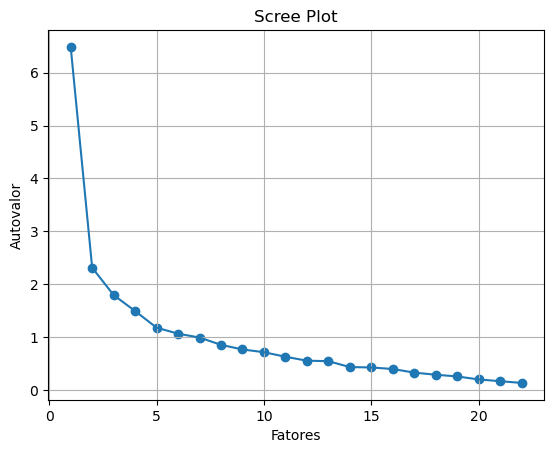

In [483]:
# Cria o Scree Plot utilizando-se MAtPlotLib
plt.scatter(range(1,23),ev)
plt.plot(range(1,23),ev)
plt.title('Scree Plot')
plt.xlabel('Fatores')
plt.ylabel('Autovalor')
plt.grid()
plt.show()

### Carga Fatorial

In [488]:
carga_fatorial = fea.loadings_.round(3)

In [531]:
carga_fatorial

array([[ 0.219, -0.003,  0.851, -0.054, -0.042, -0.025],
       [ 0.263,  0.117,  0.708,  0.063,  0.183,  0.141],
       [ 0.137,  0.071,  0.101, -0.178,  0.868,  0.077],
       [ 0.191,  0.21 ,  0.206,  0.339,  0.645, -0.22 ],
       [-0.037,  0.242,  0.55 ,  0.431,  0.063,  0.054],
       [ 0.877,  0.066,  0.025, -0.032,  0.054,  0.18 ],
       [ 0.728,  0.033,  0.036,  0.193,  0.075,  0.171],
       [ 0.539,  0.111,  0.067,  0.48 , -0.113, -0.179],
       [ 0.314, -0.138,  0.311,  0.441,  0.27 ,  0.075],
       [ 0.495, -0.091,  0.294,  0.202,  0.05 , -0.457],
       [ 0.63 , -0.082,  0.439,  0.167,  0.045, -0.241],
       [ 0.619, -0.097,  0.301,  0.283,  0.34 ,  0.071],
       [ 0.718,  0.037,  0.162,  0.149,  0.338,  0.173],
       [-0.043, -0.016,  0.693,  0.199,  0.258,  0.073],
       [ 0.36 ,  0.313,  0.426,  0.064, -0.087, -0.032],
       [ 0.146,  0.203,  0.163,  0.124, -0.044,  0.653],
       [ 0.397,  0.053,  0.149,  0.616, -0.059, -0.019],
       [ 0.196,  0.369, -0.04 ,

In [493]:
# Impressão dos autovalores originais, variância original, autovalores rotacionados e variância rotacionada
print('         Matriz de Componente Rotativa')
print('                      Componentes (', len(carga_fatorial[0]), ')')
print('Variável')

variaveis = ['APC1', 'APC2', 'APC3', 'APC4', 'APC5', 'ADSA1', 'ADSA2', 'ADSA3', 'ADSA4', 'ALAT1', 'ALAT2', 'ALAT3', 'ALAT4', 'AEE1', 'AEE2', 'AEE3', 'AI1', 'AI2', 'AD1', 'AD2', 'AD3', 'AD4']
i = 0
while i < len(variaveis):
    print(variaveis[i], '      ', carga_fatorial[i])
    i +=1

         Matriz de Componente Rotativa
                      Componentes ( 6 )
Variável
APC1        [ 0.219 -0.003  0.851 -0.054 -0.042 -0.025]
APC2        [0.263 0.117 0.708 0.063 0.183 0.141]
APC3        [ 0.137  0.071  0.101 -0.178  0.868  0.077]
APC4        [ 0.191  0.21   0.206  0.339  0.645 -0.22 ]
APC5        [-0.037  0.242  0.55   0.431  0.063  0.054]
ADSA1        [ 0.877  0.066  0.025 -0.032  0.054  0.18 ]
ADSA2        [0.728 0.033 0.036 0.193 0.075 0.171]
ADSA3        [ 0.539  0.111  0.067  0.48  -0.113 -0.179]
ADSA4        [ 0.314 -0.138  0.311  0.441  0.27   0.075]
ALAT1        [ 0.495 -0.091  0.294  0.202  0.05  -0.457]
ALAT2        [ 0.63  -0.082  0.439  0.167  0.045 -0.241]
ALAT3        [ 0.619 -0.097  0.301  0.283  0.34   0.071]
ALAT4        [0.718 0.037 0.162 0.149 0.338 0.173]
AEE1        [-0.043 -0.016  0.693  0.199  0.258  0.073]
AEE2        [ 0.36   0.313  0.426  0.064 -0.087 -0.032]
AEE3        [ 0.146  0.203  0.163  0.124 -0.044  0.653]
AI1        [ 0.397  0.053 

Temos então 6 componentes, sendo eles

Fator 1: ADSA1, ADSA2, ADSA3, ALAT2, ALAT3, ALAT4, AI1, AI2, AD1  
Fator 2: APC1, APC2, APC5, AEE1, AEE2, AEE3, AD3  
Fator 3: APC4, ADSA3, ADSA4, ALAT1, ALAT2, ALAT3, AI1, AI2, AD2  
Fator 4: APC4, ADSA3, ADSA4, ALAT1, ALAT2, ALAT3, AI1, AI2, AD2  
Fator 5: APC3, APC4, APC5, AEE1, AEE3  
Fator 6: ALAT1, ALAT2, ALAT3, AD1, AD2, AD4  

### Cálculo dos Escores Fatoriais para cada um dos elementos da amostra

Gera os scores para os fatores para cada um dos indivíduos da amostra ou para novos casos.


In [512]:
fatores = fea.transform(df[['APC1', 'APC2', 'APC3', 'APC4', 'APC5', 'ADSA1', 'ADSA2', 'ADSA3', 'ADSA4', 'ALAT1', 'ALAT2', 'ALAT3', 'ALAT4', 'AEE1', 'AEE2', 'AEE3', 'AI1', 'AI2', 'AD1', 'AD2', 'AD3', 'AD4']])

In [514]:
# Transforma os fatores gerados para cada observação em um novo Data Frame
df_fat=pd.DataFrame(fatores, columns=['Fat1', 'Fat2', 'Fat3','Fat4','Fat5', 'Fat6']) 

In [517]:
df_fat.head(3)

,Fat1,Fat2,Fat3,Fat4,Fat5,Fat6
0,-0.110090,-0.476582,-2.504879,0.620866,1.187722,-0.755013
1,1.226835,3.433329,-1.468316,0.702921,0.877283,-0.482878
2,-0.487607,-1.212420,0.520778,1.394332,1.063724,1.058262


In [520]:
df = pd.concat([df, df_fat], axis=1).reindex(df.index)

In [524]:
df.head()

,RespondentID,Sexo,Idade,Graduacao,Graduacao_Outro,IES_Graduacao,Lato1,Lato2,Lato3,Lato4,Lato5,IES_Lato1,IES_Lato2,IES_Lato3,IES_Lato4,IES_Lato5,Destino_Profissional,Destino_Profissional_Outro,MESTRADO_IES,MESTRADO_IES_Outro,Area_Mestrado,Atuacao_Docente_Antes_Mestrado,Tempo_Entre_Graduacao_Mestrado,Regime_Dedicacao_Mestrado,Atuacao_Docente_Durante_Mestrado,Tipo_IES_Atuacao_Mestrado,Regime_Dedicacao_Docente_Mestrado,Tempo_Atuacao_Docente_Mestrado,Mestrado_Ativ_Aprendizagem_Pesq_Cientifica,Mestrado_Ativ_Aprendizagem_Sala_Aula,Mestrado_Ativ_Aprendizagem_Leitura,Mestrado_Ativ_Aprendizagem_Estagio,Mestrado_Ativ_Aprendizagem_Informais,Mestrado_Ativ_Aprendizagem_Outros,DOUTORADO_IES,DOUTORADO_IES_Outro,Area_Doutorado,Atuacao_Docente_Antes_Doutorado,Tempo_Entre_Mestrado_Doutorado,Regime_Dedicacao_Doutorado,Atuacao_Docente_Durante_Doutorado,Tipo_IES_Atuacao_Doutorado,Regime_Dedicacao_Docente_Doutorado,Tempo_Atuacao_Docente,Doutorado_Ativ_Aprendizagem_Pesq_Cientifica,Doutorado_Ativ_Aprendizagem_Sala_Aula,Doutorado_Ativ_Aprendizagem_Leitura,Doutorado_Ativ_Aprendizagem_Estagio,Doutorado_Ativ_Aprendizagem_Informais,Doutorado_Ativ_Aprendizagem_Outros,...,ALAT_OUTRO,AEE1,AEE2,AEE3,AEE_OUTRO,AI1,AI2,AI_OUTRO,AD1,AD2,AD3,AD4,AD_OUTRO,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,FAC1_1,FAC2_1,FAC3_1,FAC4_1,FAC5_1,FAC6_1,FAC7_1,Fat1,Fat2,Fat3,Fat4,Fat5,Fat6
0,1812836846,2,40,1,NaN,1,ESTATÍSTICA,MARKETING,NaN,NaN,NaN,UFU,UFU,NaN,NaN,NaN,1,NaN,3,NaN,MARKETING,2,4,1,2,2.0,1.0,3.0,NaN,2.0,3.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,NaN,4.0,3.0,NaN,2.0,4.0,1.0,1.0,NaN,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,-0.127755,-2.304441,0.418520,-0.418158,0.006100,1.180256,-0.998602,-0.110090,-0.476582,-2.504879,0.620866,1.187722,-0.755013
1,1811173769,2,44,0,Engenharia Civil,2,Administração de RH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,Relações de poder e dinâmica das organizações,1,4,1,1,1.0,3.0,5.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,5.0,1.0,NaN,5.0,5.0,NaN,4.0,4.0,5.0,5.0,NaN,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,3.0,3.0,2.0,0.860313,-1.486463,0.365600,3.053769,0.920257,1.019630,-0.009606,1.226835,3.433329,-1.468316,0.702921,0.877283,-0.482878
2,1806566000,1,29,0,Enfermagem,2,Enfermagem do Trabalho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1,NaN,Organização e Estratégia,1,3,1,1,2.0,1.0,3.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,1.0,1.0,NaN,5.0,5.0,NaN,5.0,5.0,1.0,1.0,NaN,4.0,5.0,5.0,3.0,4.0,3.0,4.0,4.0,3.0,5.0,4.0,1.0,4.0,4.0,3.0,5.0,5.0,5.0,1.0,1.0,1.0,4.0,4.0,5.0,0.285949,0.964877,1.771231,-0.897291,-1.406901,0.602186,-0.591369,-0.487607,-1.212420,0.520778,1.394332,1.063724,1.058262
3,1806534973,2,36,1,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1,NaN,Administração,1,3,2,1,2.0,1.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,3.0,2.0,NaN,4.0,1.0,NaN,2.0,4.0,2.0,1.0,NaN,5.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,-0.183893,0.234457,-0.081272,-0.251826,-0.117340,0.249262,0.199680,-0.136261,-0.231559,0.414896,-0.133411,-0.166486,0.317117
4,1804698731,1,26,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,Administração,2,1,2,3,NaN,NaN,NaN,1.0,2.0,3.0,NaN,NaN,Programa de Docência Voluntária,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,4.0,1.0,NaN,4.0,4.0,NaN,3.0,4.0,2.0,2.0,NaN,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,5.0,3.0,4.0,4.0,4.0,-0.953142,0.982445,0.214817,0.446056,1.055690,0.909605,-0.336087,-0.478962,0.581092,1.227420,0.636844,0.774616,-1.214256


In [527]:
df.to_csv('HBAT_FATORIAL.csv', encoding='utf-8', decimal=',')

### Conclusão

Ao iniciarmos para descobrir sua normalidade, percebemos logo de cara pelos devidos testes que essa base de dados não é normal  
Sendo assim, feito a posteriori, para meios de prática, fizemos as determinadas correções e analises dentro da AF  
Aonde chegamos aos 6 fatores que explica 65% da variancia